In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example 1 PlaneWavePropagation

 calculate the plane wave propagation parameters listed in Table 2.2

In [40]:
# problem parameters
e0 = 8.854e-12
mu0 = np.pi*4e-7
e_r = 4.3 * e0
mu_r = 1.0 * mu0
s_problem = 0.05    # conductivity 
f = 300*1e6

The equation for a lossy material is the "true" formula, while the others are useful approximations. Numerically we can show where each approximation fits.

In [41]:
# wave propagation constant for each media type
w = f/(np.pi*2)

def p_lossless(s):
    return 1j * w * np.sqrt(e_r * mu_r) * np.ones_like(s)

def p_lossy(s):
    return p_lossless(s) * np.sqrt(1 - 1j*s/(w*e_r))

def p_lowloss(s):
    return p_lossless(s) * (1 - 1j*s/(2*w*e_r) + (1/8)*(s/(w*e_r))**2)

def p_goodConductor(s):
    return (1 + 1j)*np.sqrt(w*mu_r*s/2)
    


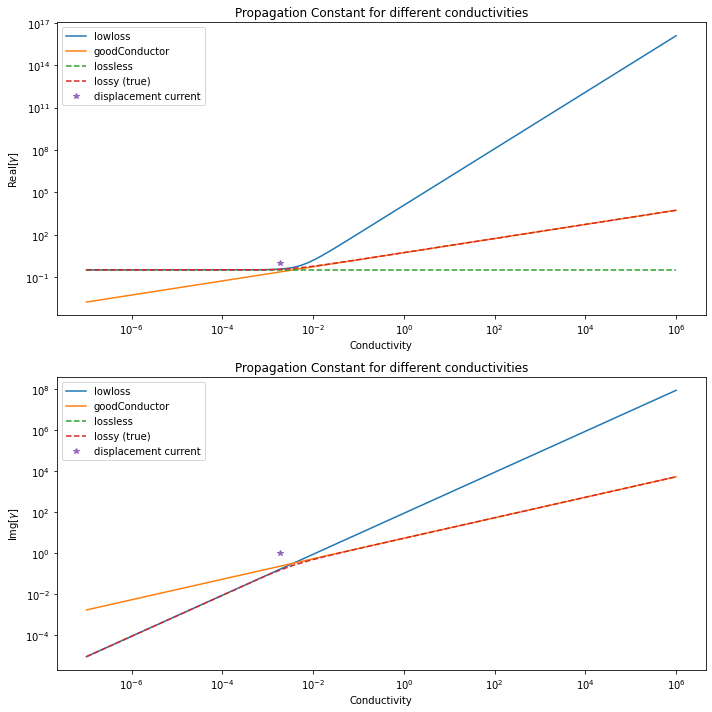

In [57]:
# plot real and img components as simga changes
s = np.logspace(-7,6,1000)

fig, axs = plt.subplots(2, figsize=[10,10])
ax_im = axs[0]
ax_im.set_xlabel("Conductivity")
ax_im.set_xscale("log")
ax_im.set_yscale("log")
ax_im.set_ylabel("Real[$\gamma$]")
ax_re = axs[1]
ax_re.set_xlabel("Conductivity")
ax_re.set_xscale("log")
ax_re.set_yscale("log")
ax_re.set_ylabel("Img[$\gamma$]")
ax_re.set_title("Propagation Constant for different conductivities")
ax_im.set_title("Propagation Constant for different conductivities")


# real part
ax_re.plot(s, np.real(p_lowloss(s)), label='lowloss')
ax_re.plot(s, np.real(p_goodConductor(s)), label='goodConductor')
ax_re.plot(s, np.real(p_lossless(s)), '--', label='lossless')
ax_re.plot(s, np.real(p_lossy(s)), '--', label='lossy (true)')
ax_re.plot(w*e_r, 1, '*', label="displacement current")

# img parta
ax_im.plot(s, np.imag(p_lowloss(s)), label='lowloss')
ax_im.plot(s, np.imag(p_goodConductor(s)), label='goodConductor')
ax_im.plot(s, np.imag(p_lossless(s)), '--', label='lossless')
ax_im.plot(s, np.imag(p_lossy(s)), '--', label='lossy (true)')
ax_im.plot(w*e_r, 1, '*', label="displacement current")

ax_im.legend()
ax_re.legend()
plt.tight_layout()
plt.savefig("lossy_approximations.png")
plt.show()